In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Einlesen des Datenatzes

In [2]:
df = pd.read_csv('boston_housing.csv',sep=',')

In [3]:
df.head()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Dokumentation der Spalten des Datensatzes:

<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s
</pre>

# Aufgabe 1 

#### a) Correlation Heat Map

Zeichnen Sie eine Correlation Heatmap für die Merkmale **lstat**, **indus**, **nox**, **rm** und **medv**. Die Werte der Korrelationskoeffizienten sollen dabei in weißer Farbe in die entsprechenden Felder eingezeichnet werden (s. Vorlesung).

<AxesSubplot:>

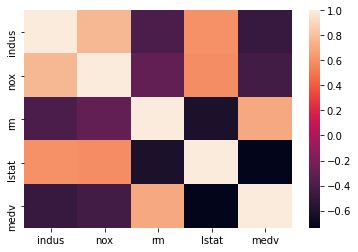

In [4]:
import seaborn as sns

co_df = df.drop(columns=['zn', 'chas', 'age', 'dis','rad', 'tax', 'ptratio', 'black'])

co = co_df.corr();

sns.heatmap(co, 
        xticklabels=co.columns,
        yticklabels=co.columns)

#### b) Pairplots

Zeichnen Sie mittels der Funktion pairplot aus der Bibliothek seaborn die paarweisen Scatterplots zwischen je zwei der Merkmale aus dem Datensatz und vergleichen Sie die Ergebnisse mit den Korrelationskoeffizienten aus Teilaufgabe a). Welche Spalten würden Sie als unabhängige Spalten zur Modellierung der Zielvariable medv mit Hilfe eines multivariaten Linearen Regressionsmodells verwenden?

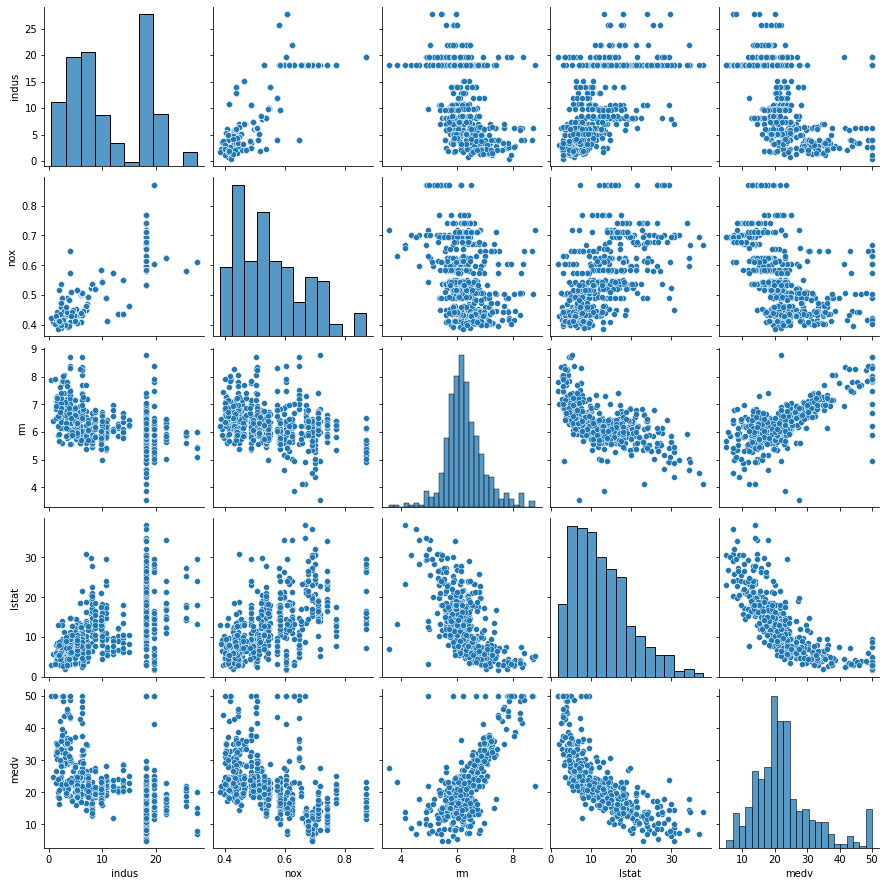

In [5]:
sns.pairplot(co_df)

## Aufgabe 2

#### a) Fit eines RANSAC-Regressors

Fitten Sie einen <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html">RANSAC-Regressor</a> in scikit-learn zur Modellierung der Beziehung zwischen den Variablen **rm** (unabhängige Variable) und **medv** (Zielvariable). Verwenden Sie zunächst die Hyperparameter max_trials=100, min_samples=50 und residual_threshold=20.0. Zeichnen Sie ein Streudiagramm, in dem Sie die Outlier in rot und die restlichen Punkte in blau einzeichnen. Zeichnen Sie auch die ermittelte Regressionsgerade in das Diagramm ein.

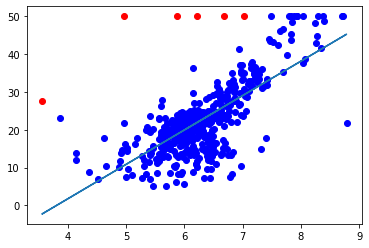

In [6]:
from sklearn.linear_model import RANSACRegressor

X = df['rm'].values.reshape(-1,1)
y = df['medv'].values.reshape(-1,1)

reg = RANSACRegressor(max_trials=100, min_samples=50, residual_threshold=20.0).fit(X, y)
reg.score(X, y)




for x1, y1, m1 in zip(X, y, reg.inlier_mask_):
    color = 'blue'  # non-outlier color
    if not m1:  # condition for being an outlier
        color = 'red'  # outlier color
    plt.scatter(x1, y1, color=color)

x = np.concatenate(X).ravel()
m, b = np.polyfit(x, y, 1)
plt.plot(x,m*x+b)
plt.show()

#### b) Wiederholen Sie Teilaufgabe a) mit residual_threshold=10.0.

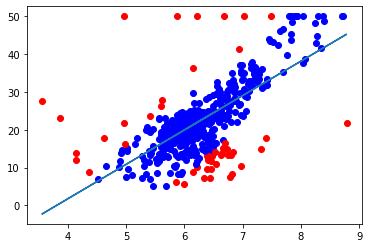

In [7]:
reg_10 = RANSACRegressor(max_trials=100, min_samples=50, residual_threshold=10.0).fit(X, y)

for x1, y1, m1 in zip(X, y, reg_10.inlier_mask_):
    color = 'blue'  # non-outlier color
    if not m1:  # condition for being an outlier
        color = 'red'  # outlier color
    plt.scatter(x1, y1, color=color)

x = np.concatenate(X).ravel()
m, b = np.polyfit(x, y, 1)
plt.plot(x,m*x+b)
plt.show()

#### c) Bestimmtheitsmaß

Berechnen Sie das <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html" >Bestimmtheitsmaß </a>  der gefitteten Gerade auf der Menge der Inliers für residual_threshold=10.0 und residual_threshold=20.0. Wie erklären Sie das Ergebnis?

In [8]:
def makeList(values, mask):
    inliners = list()
    for x, m in zip(values, mask):
        if(m):
            inliners.append(x)
    return inliners

In [9]:
from sklearn.metrics import r2_score



inliners20 = makeList(X, reg.inlier_mask_)
inliners10 = makeList(X, reg_10.inlier_mask_)

y_in_20 = makeList(y, reg.inlier_mask_)
y_in_10 = makeList(y, reg_10.inlier_mask_)


results20 = reg.predict(inliners20)
results10 = reg_10.predict(inliners10)

r2_20 = r2_score(y_in_20 , results20)
r2_10 = r2_score(y_in_10 , results10)

print(r2_20, r2_10)

0.5696043627675951 0.7651593253410405


In [10]:
results20 = reg.predict(X[reg.inlier_mask_])
results10 = reg_10.predict(X[reg_10.inlier_mask_])

r2_20 = r2_score(y[reg.inlier_mask_] , results20)
r2_10 = r2_score(y[reg_10.inlier_mask_] , results10)

print(r2_20, r2_10)

0.5696043627675951 0.7651593253410405
